In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sympy.physics.units as u
import sympy as sp
import numpy as np
import logging as log
import functools
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
pd.set_option('display.max_columns', None)
%matplotlib inline
from IPython.display import display, HTML

import sys, os, importlib
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import miptlabs as ml
importlib.reload(ml)

importlib.reload(log)
log.basicConfig(level=log.INFO, format='LOG %(message)s', stream=sys.stdout)

sp.Basic.__str__=lambda expr, **settings:ml.PQStrPrinter(settings).doprint(expr)

sp.__version__

'1.1.2.dev'

In [3]:
def get_teslameter_error(val, diap):
    return 2+0.1*(diap/val-1)
mu_0 = 4*np.pi*1e-7*u.henry/u.m
g = 9.81*u.m/u.s**2

In [4]:
data = pd.read_csv('lab1.2 table.csv')
#display(data)
df1 = pd.DataFrame()
# Зависимость поля от координаты при фиксированном токе
I = ml.PQ(0.5*u.A, sigma=0.1*u.A)
B_diap = 20
df1['z'] = ml.get_column(data, 'z', lambda row: ml.PQ(row['z']*u.cm, sigma=0.1*u.cm, dim=u.cm))
df1['B'] = ml.get_column(data, 'B', lambda row: ml.PQ(row['B']*1e-3*u.tesla, 
                                                      epsilon=get_teslameter_error(row['B'], B_diap)*1e-3))

# Зависимость тока от поля при фиксированном L
df2 = pd.DataFrame()
L = ml.PQ(4*u.cm, sigma=0.1*u.cm)
df2['I'] = ml.get_column(data, 'I', lambda row: ml.PQ(row['I']*u.amperes, sigma=0.05*u.amperes))
df2['B2'] = ml.get_column(data, 'B2', lambda row: ml.PQ(row['B2']*1e-3*u.tesla, sigma=0.01*1e-3*u.tesla))
df2['B2 diap'] = ml.get_column(data, 'B2 diap', lambda row: ml.PQ(row['B2 diap']*1e-3*u.tesla, is_const=True))


In [5]:
#display(data)

In [6]:
display(df1)
table_to_print1 = ml.prepare_to_print(df1)
#display(table_to_print)

,z,B
0,0.00±0.10 cm (NaN%),(784.00±1.70)*10^-5 T (0.22%)
1,0.50±0.10 cm (20%),(794.00±1.70)*10^-5 T (0.22%)
2,1.00±0.10 cm (10%),(804.00±1.70)*10^-5 T (0.21%)
3,1.50±0.10 cm (6.7%),(810.00±1.70)*10^-5 T (0.21%)
4,2.00±0.10 cm (5.0%),(816.00±1.80)*10^-5 T (0.21%)
5,2.50±0.10 cm (4.0%),(819.00±1.80)*10^-5 T (0.21%)
6,3.00±0.10 cm (3.3%),(822.00±1.80)*10^-5 T (0.21%)
7,3.50±0.10 cm (2.9%),(824.00±1.80)*10^-5 T (0.21%)
8,4.00±0.10 cm (2.5%),(825.00±1.80)*10^-5 T (0.21%)
9,4.50±0.10 cm (2.2%),(824.00±1.80)*10^-5 T (0.21%)


In [7]:
display(df2)
table_to_print2 = ml.prepare_to_print(df2)
#display(table_to_print)

,I,B2,B2 diap
0,0.50±0.05 A (10%),(825.00±1.00)*10^-5 T (0.12%),0.020000 T
1,1.00±0.05 A (5.0%),(1584.00±1.00)*10^-5 T (0.063%),0.020000 T
2,1.50±0.05 A (3.3%),(2320.00±1.00)*10^-5 T (0.043%),0.200000 T
3,2.00±0.05 A (2.5%),(3040.00±1.00)*10^-5 T (0.033%),0.200000 T
4,2.50±0.05 A (2.0%),(3810.00±1.00)*10^-5 T (0.026%),0.200000 T


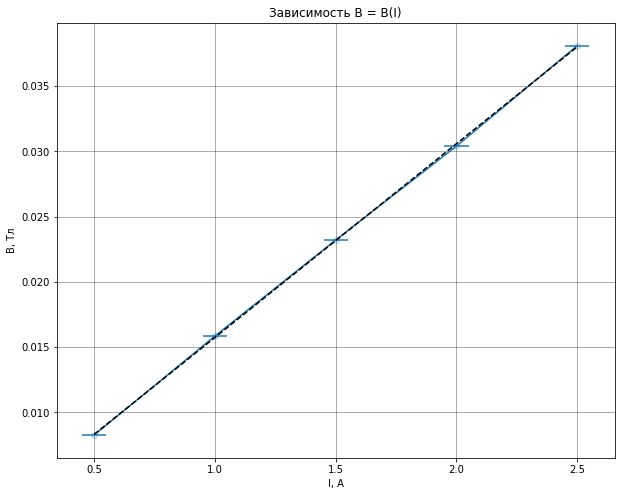

(array([ 0.014852,  0.00088 ]), [6.8422218613317651e-05, 3.4211109306658825e-05])
n= 118±7 1/cm (5.9%)


In [8]:
plt.figure(figsize=(10, 8))
ml.plt_pq(df2['I'], df2['B2'], ols=True)
plt.title('Зависимость B = B(I)')
plt.xlabel('I, A')
plt.ylabel('B, Тл')
ols = ml.OLS(df2['I'], df2['B2'])
plt.show()
print(ols)
# Коэффициент наклона прямой
k = ml.PQ(ols[0][0]*u.T/u.A, sigma=ols[0][1]*u.T/u.A)
# Плотность намотки
n = (k/mu_0).repr_as(1/u.cm)
print('n=', n)

In [9]:
# Оценка параметров соленоида
B_c = np.max(df1['B']) # Индукция в центре
print('B_c', B_c)
# Половину длины можно оценить как разность координаты, в которой максимум поля (середина) 
# и в которой половина максимума (край)
# L = ml.PQ(2*(12-4)*u.cm, is_const=True)
# print(L)
L = 16*u.cm
d = L*np.sqrt(((mu_0*I*n)/B_c)**2-1).repr_as(u.cm)
print('d=', d)
d = 2*u.cm
r = d/2

center = df1['z'][np.argmax(np.array(df1['B']))]
print('center', center)
z = df1['z']-(L-center)
#print(z)
B = (mu_0*I*n/2*ml.pqarray((-z/np.sqrt(z**2+r**2)+(z+L)/np.sqrt((z+L)**2+r**2)))).repr_as(u.tesla)
print('B', B)

B_c (825.00±1.80)*10^-5 T (0.21%)
d= 7±6 cm**2 (-89%)
center 4.00±0.10 cm (2.5%)
B [0.0073±0.0015 T (21%) 0.0073±0.0015 T (21%) 0.0073±0.0015 T (21%)
 0.0073±0.0015 T (21%) 0.0074±0.0015 T (21%) 0.0074±0.0015 T (21%)
 0.0074±0.0015 T (21%) 0.0074±0.0015 T (21%) 0.0074±0.0015 T (21%)
 0.0074±0.0015 T (21%) 0.0074±0.0015 T (21%) 0.0074±0.0015 T (21%)
 0.0074±0.0015 T (21%) 0.0073±0.0015 T (21%) 0.0073±0.0015 T (21%)
 0.0073±0.0015 T (21%) 0.0073±0.0015 T (21%) 0.0073±0.0015 T (21%)
 0.0072±0.0015 T (21%) 0.0072±0.0015 T (21%) 0.0070±0.0015 T (21%)
 0.0068±0.0015 T (22%) 0.0063±0.0014 T (22%) 0.0054±0.0012 T (23%)
 (3.7±0.9)*10^-3 T (25%) (2.0±0.7)*10^-3 T (32%) (1.1±0.5)*10^-3 T (47%)
 (0.6±0.4)*10^-3 T (70%) (0.4±0.4)*10^-3 T (95%) (0.3±0.3)*10^-3 T (120%)
 (1.90±2.80)*10^-4 T (150%)]


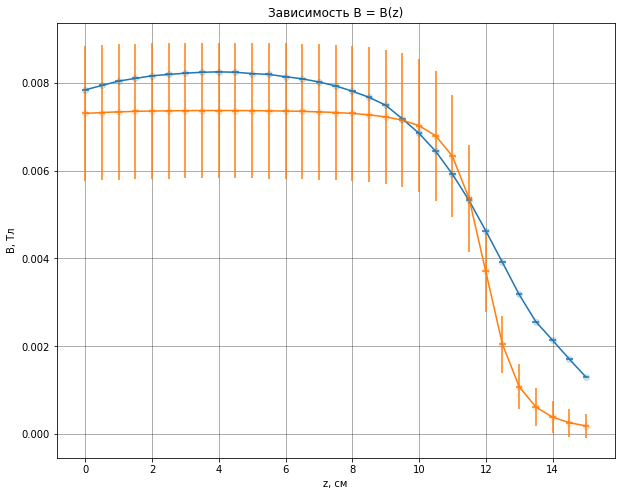

In [10]:
plt.figure(figsize=(10, 8))
ml.plt_pq(df1['z'], df1['B'])
ml.plt_pq(df1['z'], B)
plt.title('Зависимость B = B(z)')
plt.xlabel('z, см')
plt.ylabel('B, Тл')
plt.show()

In [11]:
# Часть 2
df3 = pd.DataFrame()
# d - толщина, l - длина стороны/диаметр для квадратных и круглых магнитов
d_sqr = ml.PQ(3.95*u.mm, sigma=0.05*u.mm)
l_sqr = ml.PQ(9.95*u.mm, sigma=0.05*u.mm)
d_cyl = ml.PQ(4.95*u.mm, sigma=0.05*u.mm)
l_cyl = ml.PQ(9.95*u.mm, sigma=0.05*u.mm)

df3['n'] = ml.get_column(data, 'n', lambda row: int(row['n']))
df3['B square'] = ml.get_column(data, 'B square', lambda row: ml.PQ(row['B square']*1e-3*u.tesla, sigma=0.1*1e-3*u.tesla))
df3['B cylinder'] = ml.get_column(data, 'B cylinder', lambda row: ml.PQ(row['B cylinder']*1e-3*u.tesla, sigma=0.1*1e-3*u.tesla))

In [12]:
display(df3)
table_to_print3 = ml.prepare_to_print(df3)
#display(table_to_print)
ml.write_latex('lab1.2 table3.tex', [table_to_print1, table_to_print2, table_to_print3])

,n,B square,B cylinder
0,1,(2910.0±1.0)*10^-4 T (0.034%),(3350.0±1.0)*10^-4 T (0.030%)
1,2,(3940.0±1.0)*10^-4 T (0.025%),(4150.0±1.0)*10^-4 T (0.024%)
2,3,(4330.0±1.0)*10^-4 T (0.023%),(4360.0±1.0)*10^-4 T (0.023%)
3,4,(4530.0±1.0)*10^-4 T (0.022%),(4490.0±1.0)*10^-4 T (0.022%)
4,5,(4630.0±1.0)*10^-4 T (0.022%),(4460.0±1.0)*10^-4 T (0.022%)
5,6,(4690.0±1.0)*10^-4 T (0.021%),(4500.0±1.0)*10^-4 T (0.022%)
6,7,(4720.0±1.0)*10^-4 T (0.021%),(4530.0±1.0)*10^-4 T (0.022%)
7,8,(4750.0±1.0)*10^-4 T (0.021%),(4400.0±1.0)*10^-4 T (0.023%)
8,9,(4760.0±1.0)*10^-4 T (0.021%),(4400.0±1.0)*10^-4 T (0.023%)
9,10,(4770.0±1.0)*10^-4 T (0.021%),(4420.0±1.0)*10^-4 T (0.023%)


B_mean 0.4720±0.0022 T (0.46%)
p_m (375.60±1.70)*10^3 T*m/H (0.46%)
B_theor [0.333±0.004 T (1.3%) 0.422±0.007 T (1.6%) 0.448±0.008 T (1.7%)
 0.458±0.008 T (1.7%) 0.463±0.008 T (1.8%) 0.466±0.008 T (1.8%)
 0.467±0.008 T (1.8%) 0.468±0.008 T (1.8%) 0.469±0.008 T (1.8%)
 0.470±0.008 T (1.8%)]


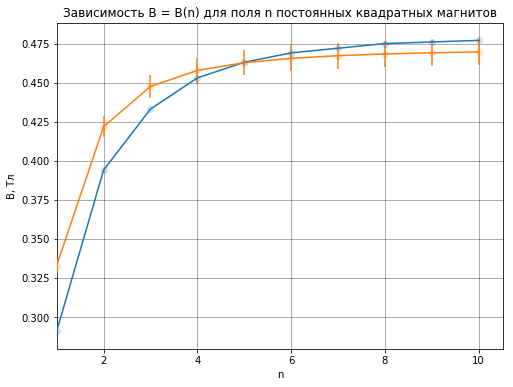

B_mean 0.4457±0.0020 T (0.44%)
p_m (354.70±1.60)*10^3 T*m/H (0.44%)
B_theor [0.314±0.004 T (1.3%) 0.398±0.006 T (1.6%) 0.423±0.007 T (1.7%)
 0.432±0.008 T (1.7%) 0.437±0.008 T (1.8%) 0.440±0.008 T (1.8%)
 0.441±0.008 T (1.8%) 0.442±0.008 T (1.8%) 0.443±0.008 T (1.8%)
 0.443±0.008 T (1.8%)]


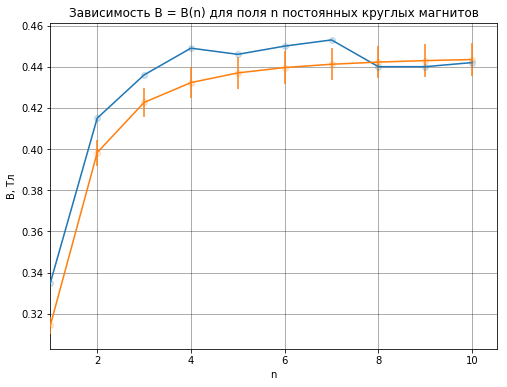

In [13]:
# Внимание: поле для квадратных считается по формуле для круглых!
plt.figure(figsize=(8,6))
ml.plt_pq(df3['n'], df3['B square'])
B_mean = ml.get_mean(df3['B square'][4:])
print('B_mean', B_mean)
p_m = B_mean/mu_0
print('p_m', p_m)
B_theor = p_m*mu_0*(ml.pqarray(df3['n'])*d_cyl)/(np.sqrt((l_cyl/2)**2+(ml.pqarray(df3['n'])*d_cyl)**2))
print('B_theor', B_theor)
ml.plt_pq(df3['n'], B_theor)
plt.xlabel('n')
plt.ylabel('B, Тл')
plt.xlim(xmin=1)
plt.title('Зависимость B = B(n) для поля n постоянных квадратных магнитов')
plt.show()

plt.figure(figsize=(8,6))
ml.plt_pq(df3['n'], df3['B cylinder'])
B_mean = ml.get_mean(df3['B cylinder'][3:])
print('B_mean', B_mean)
p_m = B_mean/mu_0
print('p_m', p_m)
B_theor = p_m*mu_0*(ml.pqarray(df3['n'])*d_cyl)/(np.sqrt((l_cyl/2)**2+(ml.pqarray(df3['n'])*d_cyl)**2))
print('B_theor', B_theor)
ml.plt_pq(df3['n'], B_theor)
plt.xlabel('n')
plt.ylabel('B, Тл')
plt.xlim(xmin=1)
plt.title('Зависимость B = B(n) для поля n постоянных круглых магнитов')
plt.show()

In [14]:
# Часть 3
r_max = ml.PQ(33.6*u.mm, sigma=0.05*u.mm)
print('r_max', r_max)
m_s = ml.get_column(data, 'mass', lambda row: ml.PQ(row['mass']*u.g, sigma=0.001*u.g))
m = ml.get_mean(m_s)
P_m = (r_max**2*np.sqrt(4*np.pi*m*g/(6*mu_0))).repr_as(u.joule/u.tesla)
print('P_m', P_m)
p_m = (P_m/(np.pi*(l_cyl/2)**2*d_cyl)).repr_as(u.ampere/u.m)
print('p_m', p_m)
# p_m = np.sqrt(3*m*g/(8*sp.pi*r_max**2)).repr_as(u.tesla)
# print('p_m', p_m)
B_r = (mu_0*p_m).repr_as(u.tesla)
print('B_r', B_r)

r_max 33.60±0.05 mm (0.15%)
P_m (250.2±0.8)*10^-3 J/T (0.34%)
p_m (65.0±1.0)*10^4 A/m (1.5%)
B_r 2.20±0.03 T (1.5%)


In [15]:
# Часть 4
k = 10
N = 20
T = ml.PQ(57.97*u.s, sigma=1*u.s)/N
m = ml.PQ(2.933*u.g, sigma=0.001*u.g)
m_sum = k*m
print('m_sum', m_sum)
B = df3['B cylinder'][k-1]
J = (1/12*m_sum*(d_cyl*k)**2+1/4*m_sum*(l_cyl/2)**2).repr_as(u.g*u.m**2)
print('J', J)
V = np.pi*(l_cyl/2)**2*d_cyl
P_m = (B/mu_0*V).repr_as(u.ampere/u.m)
print('P_m', P_m)
B_h = (J/(P_m)*(2*np.pi/T)**2).repr_as(u.tesla)
print('B_h', B_h)

m_sum 29.330±0.010 g (0.034%)
J (61.70±1.20)*10^-4 g*m**2 (2.0%)
P_m 0.1354±0.0019 A/m (1.4%)
B_h (33.90±1.40)*10^-4 T (4.2%)
